In [1]:
import matplotlib
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from tqdm import tqdm
import os

In [8]:
rootdir = './compare1/'
list = os.listdir(rootdir) #列出文件夹下所有的目录与文件
list.sort()
#读取一个lat，lon
ds = xr.open_dataset(rootdir+list[1],decode_times=False)
ts  = ds['ts'][0,0]
lon = ts.coords['lon'].values
lat = ts.coords['lat'].values
a = 6.371e6
list.sort()
list = list[1:-1]

lat = abs(lat)
lat[0] = lat[1]
lon[-1] = lon[0]

In [9]:
lat

array([88., 88., 86., 84., 82., 80., 78., 76., 74., 72., 70., 68., 66.,
       64., 62., 60., 58., 56., 54., 52., 50., 48., 46., 44., 42., 40.,
       38., 36., 34., 32., 30., 29., 28., 27., 26., 25., 24., 23., 22.,
       21., 20., 19., 18., 17., 16., 15., 14., 13., 12., 11., 10.,  9.,
        8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.,  1.,  2.,  3.,  4.,
        5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       32., 34., 36., 38., 40., 42., 44., 46., 48., 50., 52., 54., 56.,
       58., 60., 62., 64., 66., 68., 70., 72., 74., 76., 78.],
      dtype=float32)

In [10]:
%%time
# 表面积计算 # SST  
S = []
Sqhere = 0.0
for i in range(len(lat)):
    for j in range(len(lon)-1):
        if np.isnan(ts[i,j]):
            continue
        elif (lat[i]<31):
            v = np.sin(np.pi/180*(lat[i]+0.5))-np.sin(np.pi/180*(lat[i]-0.5))
            area = v*np.pi/180*(2.0)*a*a
            S.append(area)
            Sqhere =Sqhere + area
        else:
            v = np.sin(np.pi/180*(lat[i]+1.0))-np.sin(np.pi/180*(lat[i]-1.0)) # lat:i,lon:j
            area = v*np.pi/180*(2.0)*a*a
            S.append(area)
            Sqhere =Sqhere + area
print('%e' % Sqhere)  #3.6e14

3.535236e+14
CPU times: user 17.5 s, sys: 5.78 ms, total: 17.5 s
Wall time: 17.8 s


In [11]:
%%time
# SST计算 
SST_series = []   #
for n in tqdm(range(len(list))):
    try: 
        ds = xr.open_dataset(rootdir+list[n],decode_times=False)
    except:
        continue
    ts  = ds['ts'][0,0]
    SST = 0.0
    ii = 0
    for i in range(len(lat)):
        for j in range(len(lon)-1):
            if np.isnan(ts[i,j]):
                continue
            elif (lat[i]<31):
                SST = SST + S[ii]*ts[i,j].values
                ii = ii + 1
            else:
                SST = SST + S[ii]*ts[i,j].values
                ii = ii + 1
    SST_series.append(abs(SST/Sqhere))
    #print('%e' % SST)
#print('%e' % v)
#print('%e' % S)  #3.6e14 4.16e13
#print('%e' % S)

100%|██████████| 59/59 [26:39<00:00, 27.11s/it]

CPU times: user 26min 16s, sys: 153 ms, total: 26min 16s
Wall time: 26min 39s


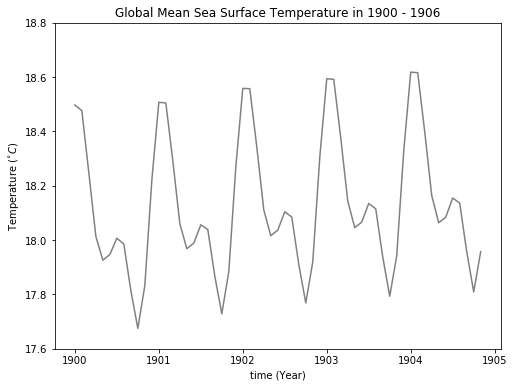

In [20]:
plt.figure(figsize=(8,6))
ax = plt.subplot()
ax.plot(SST_series,color='gray')
ax.set(xlabel='time (Year)', ylabel='Temperature ($^{\circ}C$)',
        title='Global Mean Sea Surface Temperature in 1900 - 1906')
ax.set_xticks([0,12,24,36,48,60])
tick = [1900,1901,1902,1903,1904,1905,1906]
ax.set_xticklabels(tick)
ax.set_ylim(17.6,18.8)
#plt.savefig('GloSST78-90.png')
plt.show()


In [54]:
data = np.loadtxt("log00-06") 
#data.shape
months = data[:,0]
days = data[:,1]
SST = data[:,4]
temp = data[:,5]

In [59]:
SST=SST[:1780]

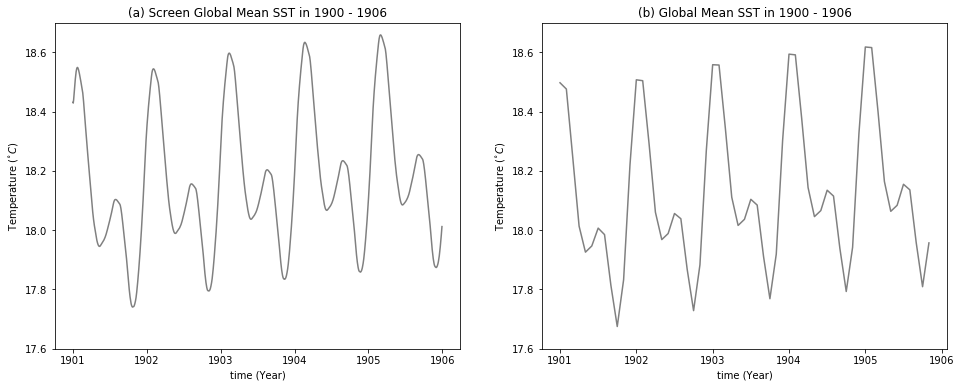

In [62]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(SST,color='gray')
#as.set_xtick()
ax1.set(xlabel='time (Year)', ylabel='Temperature ($^{\circ}C$)',
        title='(a) Screen Global Mean SST in 1900 - 1906')
ax1.set_xticks([0,356,712,1068,1424,1780])
tick1 = [1901,1902,1903,1904,1905,1906]
ax1.set_xticklabels(tick1)
ax1.set_ylim(17.6,18.7)


ax = plt.subplot(1,2,2)
ax.plot(SST_series,color='gray')
ax.set(xlabel='time (Year)', ylabel='Temperature ($^{\circ}C$)',
        title='(b) Global Mean SST in 1900 - 1906')
ax.set_xticks([0,12,24,36,48,60])
tick = [1901,1902,1903,1904,1905,1906]
ax.set_xticklabels(tick)
ax.set_ylim(17.6,18.7)

plt.savefig('GlobalMeanSST00-06.png')
plt.show()

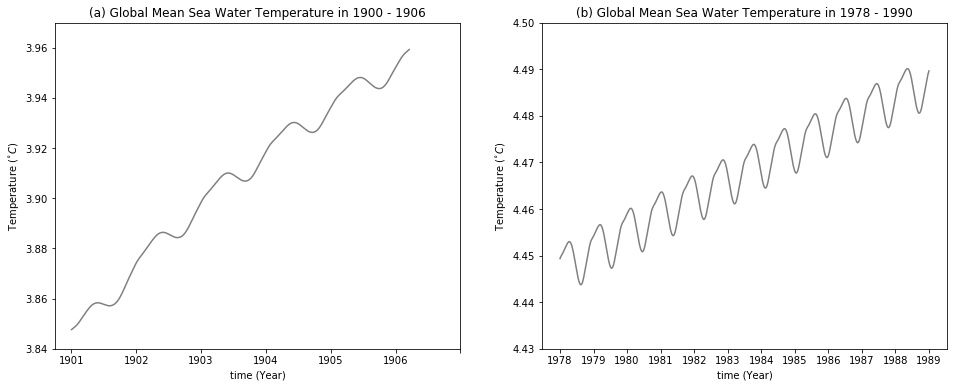

In [86]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(temp,color='gray')
#as.set_xtick()
ax1.set(xlabel='time (Year)', ylabel='Temperature ($^{\circ}C$)',
        title='(a) Global Mean Sea Water Temperature in 1900 - 1906')
ax1.set_xticks([0,356,712,1068,1424,1780,2136])
tick = [1901,1902,1903,1904,1905,1906]
ax1.set_xticklabels(tick)
ax1.set_ylim(3.84,3.97)
#plt.savefig('GloWater00-06.png')


ax2 = plt.subplot(1,2,2)
ax2.plot(temp2,color='gray')
#as.set_xtick()
ax2.set(xlabel='time (Year)', ylabel='Temperature ($^{\circ}C$)',
        title='(b) Global Mean Sea Water Temperature in 1978 - 1990')
tickx = np.linspace(0,365*12,12)
ax2.set_xticks(tickx)
tick = [1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990]
ax2.set_xticklabels(tick)
ax2.set_ylim(4.43,4.5)

plt.savefig('GloWater.png')
plt.show()

In [43]:
temp

array([3.84767455, 3.84771111, 3.84772831, ..., 3.95915989, 3.95922534,
       3.95929132])

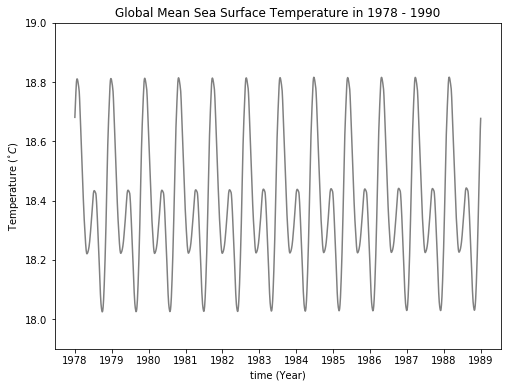

In [76]:
data2 = np.loadtxt("log") 
months2 = data2[:,0]
days2 = data2[:,1]
SST2 = data2[:,4]
temp2 = data2[:,5]

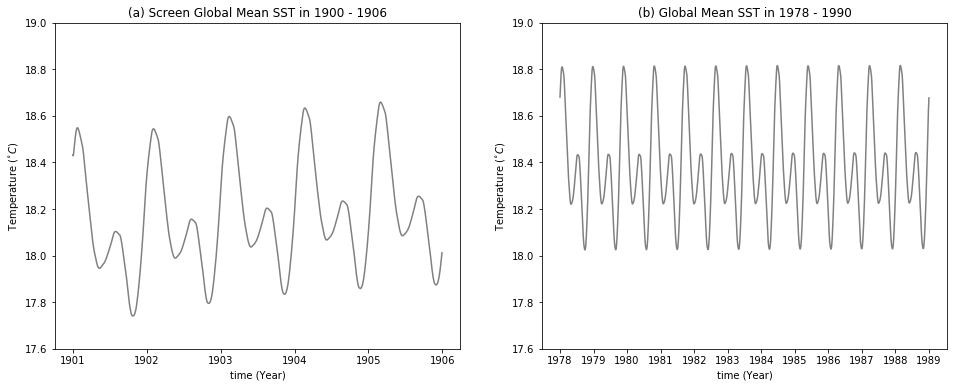

In [80]:
plt.figure(figsize=(16,6))

ax1 = plt.subplot(1,2,1)
ax1.plot(SST,color='gray')
ax1.set(xlabel='time (Year)', ylabel='Temperature ($^{\circ}C$)',
        title='(a) Screen Global Mean SST in 1900 - 1906')
ax1.set_xticks([0,356,712,1068,1424,1780])
tick1 = [1901,1902,1903,1904,1905,1906]
ax1.set_xticklabels(tick1)
ax1.set_ylim(17.6,19)

ax = plt.subplot(1,2,2)
ax.plot(SST2,color='gray')
#as.set_xtick()
ax.set(xlabel='time (Year)', ylabel='Temperature ($^{\circ}C$)',
        title='(b) Global Mean SST in 1978 - 1990')
tickx = np.linspace(0,365*12,12)
ax.set_xticks(tickx)
tick = [1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990]
ax.set_xticklabels(tick)
ax.set_ylim(17.6,19)

plt.savefig('GlobalMeanSST78-90.png')
plt.show()